In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

from utils.wsi.tiles import generate_tiles
from utils.wsi.patches import generate_patch_tiles
#from utils.wsi.patches import generate_patch_fast

In [2]:
from pathlib import Path
svs_file = Path("./data/01_01_0164.svs")
#patches = generate_patch_fast(svs_file, (1024, 1024), 0)

TypeError: 'generator' object is not subscriptable

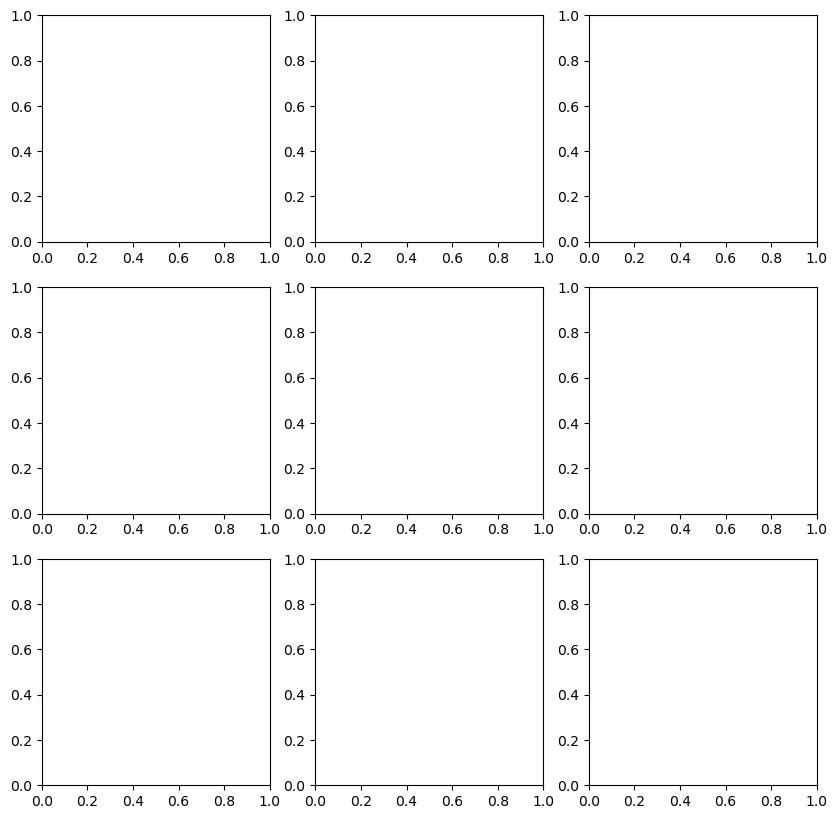

In [26]:
fig, axes = plt.subplots(3, 3, figsize = (10, 10))
for i, ax in enumerate(axes.flat):
  ax.imshow(patches[i])
  ax.set_xticks([])
  ax.set_yticks([])
plt.tight_layout()
plt.show()

In [3]:
from utils.wsi.patches import generate_patch_svs_thresholding
patches = generate_patch_svs_thresholding(svs_file, (1024, 1024), 0)

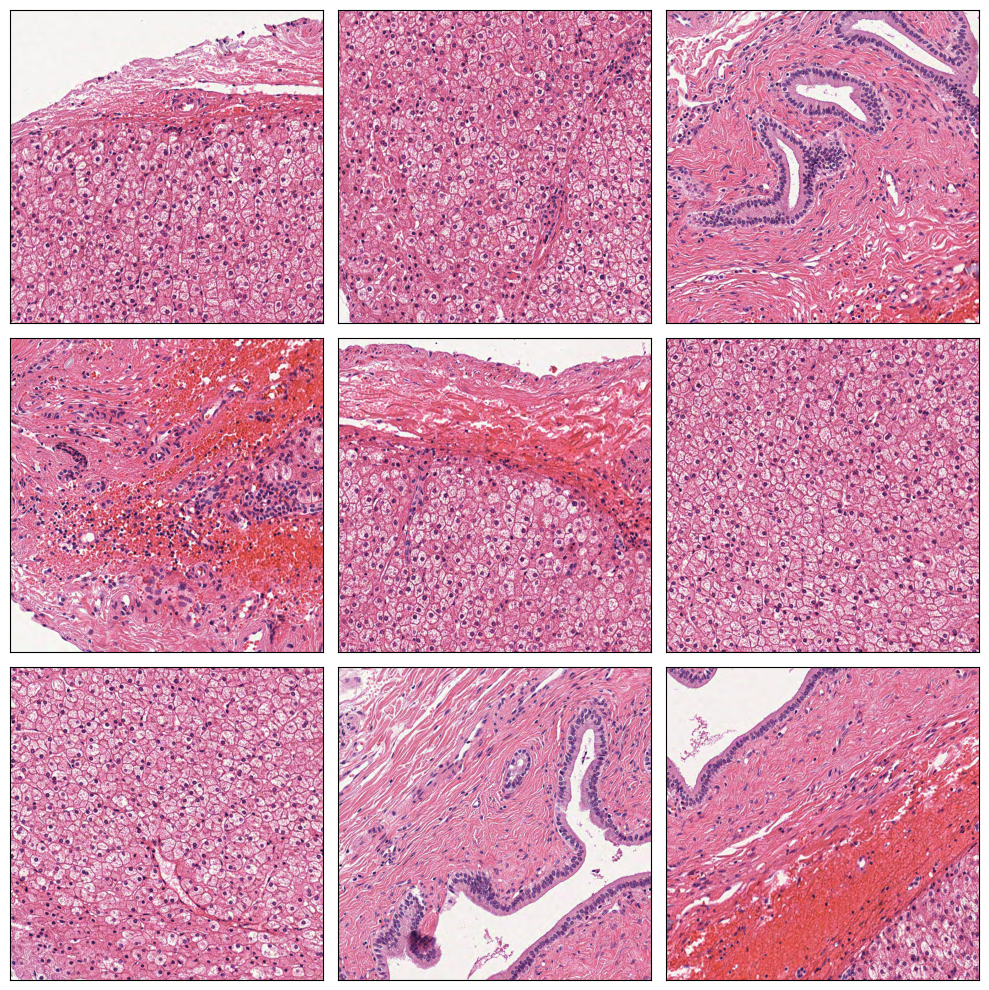

In [4]:
fig, axes = plt.subplots(3, 3, figsize = (10, 10))
for i, ax in enumerate(axes.flat):
  ax.imshow(next(patches))
  ax.set_xticks([])
  ax.set_yticks([])
plt.tight_layout()
plt.show()

In [5]:
from utils.wsi.patches import generate_patches

#generate_patches?

In [6]:
generate_patches(
    Path("data/01_01_0164.svs"),
    Path("data/train"),
)

Generating tiles...


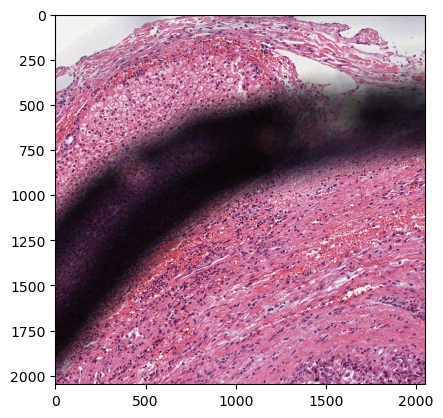

In [12]:
import openslide

path = "data/01_01_0164.svs"

slide = openslide.OpenSlide(path)

x, y = slide.dimensions

s_x = x // 1024
s_y = y // 1024

s = slide.read_region((6000, 6000), 0, (2048, 2048))

plt.imshow(s)

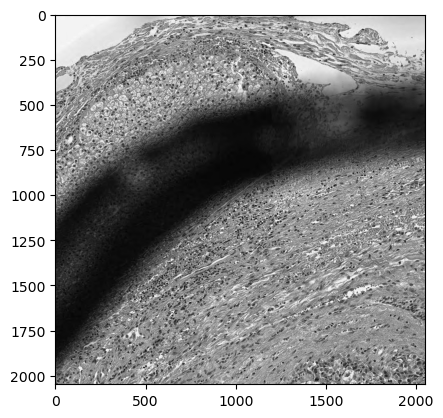

In [13]:
img = cv.cvtColor(np.array(s), cv.COLOR_RGB2GRAY)
plt.imshow(img, cmap="gray")

In [14]:
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur, 200, 255, cv.THRESH_BINARY)

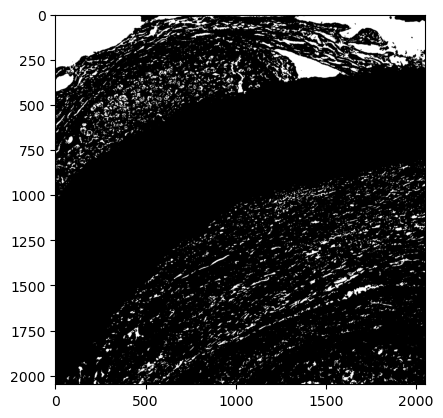

In [15]:
plt.imshow(th3, cmap="gray")

In [16]:
print(th3[100])
print(img[100])

[255 255 255 ... 255 255 255]
[243 243 243 ... 214 214 214]


In [17]:
total = 2048 * 2048
cells = cv.countNonZero(th3)

100 - ((cells / total) * 100)

89.55814838409424